In [310]:


import numpy as np
import math
import random as rand
import matplotlib.pyplot as plt

paras = list((rand.random() - 0.5 for _ in range(13)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def y_gen(x):
    h_11 = sigmoid(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = sigmoid(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = sigmoid(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = sigmoid(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

from sklearn.model_selection import train_test_split

r = 0.2
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=r)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=r)

In [311]:
# Neural Network Implementation
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize neural network with given sizes and learning rate
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases randomly
        self.weights_input_hidden = np.random.uniform(-1, 1, size=(self.hidden_size, self.input_size))
        self.bias_input_hidden = np.zeros((self.hidden_size, 1))
        self.weights_hidden_output = np.random.uniform(-1, 1, size=(self.output_size, self.hidden_size))
        self.bias_hidden_output = np.zeros((self.output_size, 1))

    def sigmoid(self, x):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivative of sigmoid function
        return x * (1 - x)

    def forward_pass(self, x):
        # Forward pass through the neural network
        # Input to hidden layer
        self.hidden_input = np.dot(self.weights_input_hidden, x) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        # Hidden to output layer
        self.output = np.dot(self.weights_hidden_output, self.hidden_output) + self.bias_hidden_output
        return self.output

    def backward_propagation(self, x, y, output):
        # Backward pass to update weights and biases
        # Compute gradients
        output_error = output - y
        hidden_output_error = np.dot(self.weights_hidden_output.T, output_error)
        hidden_error = hidden_output_error * self.sigmoid_derivative(self.hidden_output)

        d_weights_hidden_output = np.dot(output_error, self.hidden_output.T)
        d_weights_input_hidden = np.dot(hidden_error, x.T)

        # Update weights and biases
        self.weights_hidden_output -= self.learning_rate * d_weights_hidden_output
        self.bias_hidden_output -= self.learning_rate * np.sum(output_error, axis=1, keepdims=True)
        self.weights_input_hidden -= self.learning_rate * d_weights_input_hidden
        self.bias_input_hidden -= self.learning_rate * np.sum(hidden_error, axis=1, keepdims=True)
    
    
    def adjust_learning_rate(self, train_costs, valid_costs):
        if len(valid_costs) >= 50:
            # Check if validation cost increased compared to the previous epoch
            if valid_costs[-1] > valid_costs[-2]:
                # If validation cost increased, decrease the learning rate
                self.learning_rate *= 0.5  # Decrease learning rate by a factor (e.g., 0.5)
            else:
                # If validation cost decreased or stayed the same, keep the learning rate constant
                pass

    def train(self, x_train, y_train, x_valid, y_valid, epochs=100):
        # Train the neural network
        train_costs = []
        valid_costs = []

        for epoch in range(epochs):
            # Training
            train_cost = 0
            for i in range(len(x_train)):
                x = np.array(x_train[i]).reshape(-1, 1)
                y = np.array(y_train[i]).reshape(-1, 1)
                output = self.forward_pass(x)
                train_cost += np.sum((output - y) ** 2)
                self.backward_propagation(x, y, output)
            train_costs.append(train_cost / len(x_train))

            # Validation
            valid_cost = 0
            for i in range(len(x_valid)):
                x = np.array(x_valid[i]).reshape(-1, 1)
                y = np.array(y_valid[i]).reshape(-1, 1)
                output = self.forward_pass(x)
                # Calculate mean squared error
                valid_cost += np.sum((output - y) ** 2)
            valid_costs.append(valid_cost / len(x_valid))

            # Print epoch-wise training and validation costs
            print(f"Epoch {epoch + 1}/{epochs}, Train Cost: {train_costs[-1]}, Valid Cost: {valid_costs[-1]}")
            
            # Adjust learning rate after each epoch
            self.adjust_learning_rate(train_costs, valid_costs)

        return train_costs, valid_costs

    def predict(self, x):
        # Predict outputs for given inputs
        outputs = []
        for i in range(len(x)):
            output = self.forward_pass(np.array(x[i]).reshape(-1, 1))
            outputs.append(output.item())
        return outputs

Epoch 1/300, Train Cost: 0.05866745969745816, Valid Cost: 0.04376384188741018
Epoch 2/300, Train Cost: 0.04857906502751041, Valid Cost: 0.04233596015348635
Epoch 3/300, Train Cost: 0.0471505380132499, Valid Cost: 0.041090112553173505
Epoch 4/300, Train Cost: 0.04579506174155353, Valid Cost: 0.039910742615433696
Epoch 5/300, Train Cost: 0.04450605827185791, Valid Cost: 0.03878984578854241
Epoch 6/300, Train Cost: 0.043277336101562945, Valid Cost: 0.037721826920694874
Epoch 7/300, Train Cost: 0.04210325049387869, Valid Cost: 0.03670178689480229
Epoch 8/300, Train Cost: 0.040978811185546214, Valid Cost: 0.035725392844430076
Epoch 9/300, Train Cost: 0.03989960472748089, Valid Cost: 0.03478880587512188
Epoch 10/300, Train Cost: 0.03886172336797831, Valid Cost: 0.03388862038857846
Epoch 11/300, Train Cost: 0.037861703944047434, Valid Cost: 0.03302181200673919
Epoch 12/300, Train Cost: 0.03689647525750734, Valid Cost: 0.03218569266436399
Epoch 13/300, Train Cost: 0.03596331256773775, Valid Co

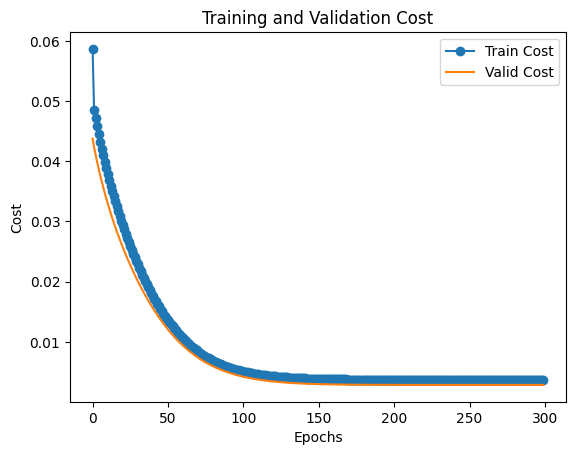

In [312]:
# Create and train the neural network
input_size = 2
hidden_size = 3
output_size = 1
learning_rate = 0.01
epochs = n

neural_network = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
train_costs, valid_costs = neural_network.train(x_train, y_train, x_valid, y_valid, epochs)

# Plot training and validation costs
plt.plot(range(epochs), train_costs, label='Train Cost', marker = "o")
plt.plot(range(epochs), valid_costs, label='Valid Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training and Validation Cost')
plt.legend()
plt.show()

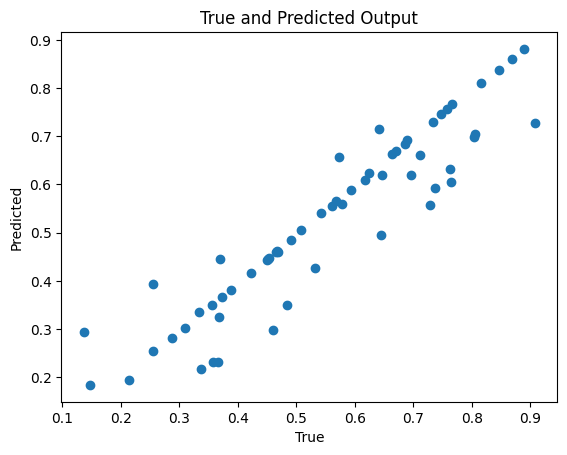

In [313]:
# Predictions and evaluation
predictions = neural_network.predict(x_test)

# Scatter plot for true values vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True and Predicted Output')
plt.show()